In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
!git clone https://github.com/musheera2/underwater-image-enhancement-recognition.git

fatal: destination path 'underwater-image-enhancement-recognition' already exists and is not an empty directory.


In [5]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization,MaxPool2D
from tensorflow.keras.preprocessing.image import load_img
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing.image import img_to_array

Training Data Set

In [6]:
DATASET="./underwater-image-enhancement-recognition/Dataset/Train/"

CATEGORIES=["Corals", "Crabs", "Dolphin", "Eel", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]
#ten types of leaf diseases       
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in random.choices(os.listdir(path),k=450):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))            
            train_data.append([img,label])

In [7]:
len(train_data)

8550

Test Data

In [8]:
DATASET="./underwater-image-enhancement-recognition/Dataset/Test/"

CATEGORIES=["Corals", "Crabs", "Dolphin", "Eel", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]
#ten types of leaf diseases       
test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in random.choices(os.listdir(path),k=100):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))            
            test_data.append([img,label])

In [9]:
print(len(train_data)) # size of train dataset
print(len(test_data))  # size of validation dataset

8550
1900


In [10]:
print(f"The shape of the Training Data:\n")
train_data[0][0].shape

The shape of the Training Data:



(128, 128, 3)

Validation Data

In [12]:
val_data=[]
DATASET="./underwater-image-enhancement-recognition/Dataset/Val/"

CATEGORIES=["Corals", "Crabs", "Dolphin", "Eel", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in random.choices(os.listdir(path),k=100):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))
            val_data.append([img,label])
            
print(len(train_data)) # size of train dataset
print(len(test_data))
print(len(val_data))# size of validation dataset

8550
1900
1900


Performing Train_Test_Val splitting

In [13]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

    
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [14]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("Corals")
    elif i==1:
        Y.append("Crabs")
    elif i==2:
        Y.append("Dolphin")
    elif i==3:
        Y.append("Eel")
    elif i==4:
        Y.append("Jelly Fish")
    elif i==5:
        Y.append("Lobster")
    elif i==6:
        Y.append("Nudibranchs")
    elif i==7:
        Y.append("Octopus")
    elif i==8:
        Y.append("Penguin")
    elif i==9:
        Y.append("Puffers")
    elif i==10:
        Y.append("Sea Rays")
    elif i==11:
        Y.append("Sea Urchins")
    elif i==12:
        Y.append("Seahorse")
    elif i==13:
        Y.append("Seal")
    elif i==14:
        Y.append("Sharks")
    elif i==15:
        Y.append("Squid")
    elif i==16:
        Y.append("Starfish")
    elif i==17:
        Y.append("Turtle_Tortoise")
    else:
        Y.append("Whale")

len(X_train),len(y_train)

(8550, 8550)

In [15]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("Corals")
    elif i==1:
        Z.append("Crabs")
    elif i==2:
        Z.append("Dolphin")
    elif i==3:
        Z.append("Eel")
    elif i==4:
        Z.append("Jelly Fish")
    elif i==5:
        Z.append("Lobster")
    elif i==6:
        Z.append("Nudibranchs")
    elif i==7:
        Z.append("Octopus")
    elif i==8:
        Z.append("Penguin")
    elif i==9:
        Z.append("Puffers")
    elif i==10:
        Z.append("Sea Rays")
    elif i==11:
        Z.append("Sea Urchins")
    elif i==12:
        Z.append("Seahorse")
    elif i==13:
        Z.append("Seal")
    elif i==14:
        Z.append("Sharks")
    elif i==15:
        Z.append("Squid")
    elif i==16:
        Z.append("Starfish")
    elif i==17:
        Z.append("Turtle_Tortoise")
    else:
        Z.append("Whale")


len(X_test),len(y_test)

(1900, 1900)

In [16]:
X_val=[]
y_val=[]

for features,label in val_data:
    X_val.append(features)
    y_val.append(label)
    
Z=[]
for i in y_val:
    if i==0:
        Z.append("Corals")
    elif i==1:
        Z.append("Crabs")
    elif i==2:
        Z.append("Dolphin")
    elif i==3:
        Z.append("Eel")
    elif i==4:
        Z.append("Jelly Fish")
    elif i==5:
        Z.append("Lobster")
    elif i==6:
        Z.append("Nudibranchs")
    elif i==7:
        Z.append("Octopus")
    elif i==8:
        Z.append("Penguin")
    elif i==9:
        Z.append("Puffers")
    elif i==10:
        Z.append("Sea Rays")
    elif i==11:
        Z.append("Sea Urchins")
    elif i==12:
        Z.append("Seahorse")
    elif i==13:
        Z.append("Seal")
    elif i==14:
        Z.append("Sharks")
    elif i==15:
        Z.append("Squid")
    elif i==16:
        Z.append("Starfish")
    elif i==17:
        Z.append("Turtle_Tortoise")
    else:
        Z.append("Whale")


len(X_val),len(y_val)

(1900, 1900)

In [17]:
X_train=np.array(X_train).reshape(-1,128,128,3)
X_train=X_train/255.0
print(X_train.shape)

X_test=np.array(X_test).reshape(-1,128,128,3)
X_test=X_test/255.0
print(X_test.shape)

X_val=np.array(X_val).reshape(-1,128,128,3)
X_val=X_val/255.0
print(X_val.shape)


(8550, 128, 128, 3)
(1900, 128, 128, 3)
(1900, 128, 128, 3)


One hot Encoding the labels of Train, Test, Val

In [18]:
y_train=to_categorical(y_train)


y_test=to_categorical(y_test)
y_val = to_categorical(y_val)

In [19]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
import warnings
warnings.filterwarnings("ignore")

In [21]:
AlexNet_model = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(19, activation='softmax')
])
AlexNet_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

AlexNet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 96)        34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 384)        

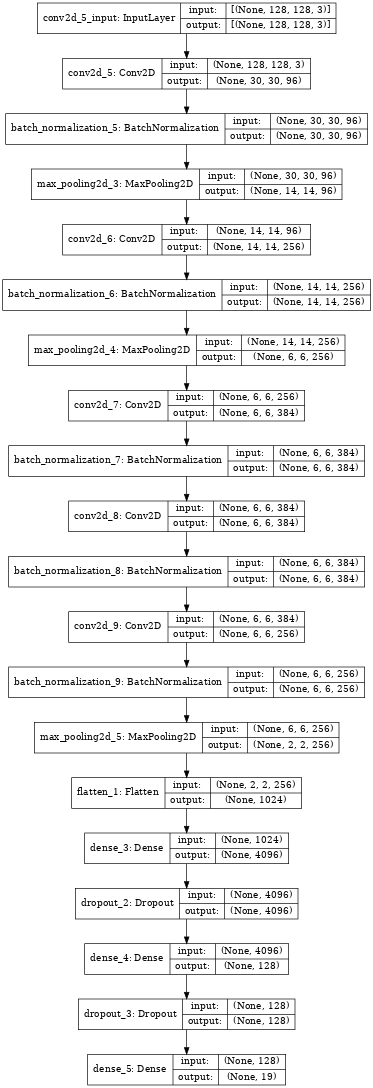

In [22]:
import tensorflow as tf
tf.keras.utils.plot_model(AlexNet_model, show_shapes=True, dpi=48)

In [23]:
X_train[0].shape

(128, 128, 3)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

model_checkpoint = ModelCheckpoint(
    filepath="AlexNet_model_on_underwater.h5",
    verbose=3,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# early_stopping= EarlyStopping(monitor="val_loss",patience=4,verbose=3,mode="min")

reducelrplateau= ReduceLROnPlateau(monitor='val_loss', factor=0.2,verbose=3,patience=1,mode="min", min_lr=0.0001)


hist=AlexNet_model.fit(X_train,y_train,epochs=150,batch_size=128,validation_split=0.2,callbacks= [model_checkpoint,reducelrplateau])

2023-01-24 11:18:46.444853: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1344798720 exceeds 10% of free system memory.
2023-01-24 11:18:48.405619: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1344798720 exceeds 10% of free system memory.


Epoch 1/150
54/54 [==============================] - ETA: 0s - loss: 3.0051 - accuracy: 0.0683

2023-01-24 11:18:53.000902: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 336199680 exceeds 10% of free system memory.


54/54 [==============================] - 5s 91ms/step - loss: 3.0051 - accuracy: 0.0683 - val_loss: 2.9420 - val_accuracy: 0.0485

Epoch 00001: val_accuracy improved from -inf to 0.04854, saving model to AlexNet_model_on_underwater.h5
Epoch 2/150
54/54 [==============================] - 3s 50ms/step - loss: 2.9174 - accuracy: 0.0754 - val_loss: 2.9753 - val_accuracy: 0.0766

Epoch 00002: val_accuracy improved from 0.04854 to 0.07661, saving model to AlexNet_model_on_underwater.h5

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 3/150
54/54 [==============================] - 3s 52ms/step - loss: 2.8880 - accuracy: 0.0870 - val_loss: 2.8901 - val_accuracy: 0.0825

Epoch 00003: val_accuracy improved from 0.07661 to 0.08246, saving model to AlexNet_model_on_underwater.h5
Epoch 4/150
54/54 [==============================] - 3s 53ms/step - loss: 2.8696 - accuracy: 0.0961 - val_loss: 2.8650 - val_accuracy: 0.0860

Epoch 00004: val_accuracy improved from 

In [26]:
AlexNet_model.load_weights('./AlexNet_model_on_underwater.h5')
# VGG19_model = tf.keras.models.load_model('/content/drive/MyDrive/CNN PROJECTS/MTech Research<Project>/MODELS/VGG19/VGG19_model_on_tomato.h5')

In [27]:
test_loss,test_acc=AlexNet_model.evaluate(X_test,y_test)
test_loss,test_acc

60/60 [==============================] - 1s 13ms/step - loss: 5.6166 - accuracy: 0.3874


(5.616613864898682, 0.38736841082572937)

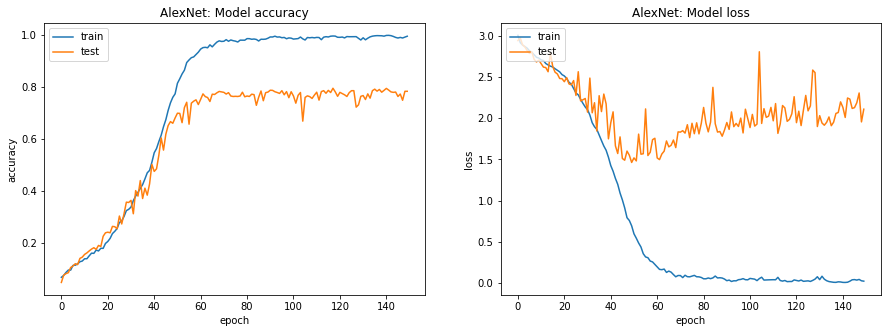

In [28]:
# Plot the accuracy and loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('AlexNet: Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('AlexNet: Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
y_pred=AlexNet_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)



In [30]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [31]:
y_test= np.argmax(y_test,axis=-1)

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='AlexNet:Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="right",
                 color="White" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


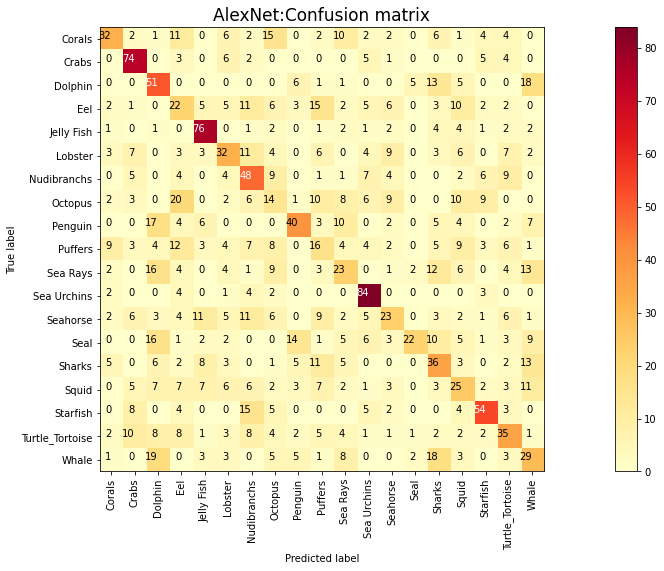

In [33]:
import itertools
plt.figure(figsize=(20,7))
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=CATEGORIES)
plt.xticks(rotation=90)
plt.savefig("AlexNet confusion_matrix.jpg")

In [34]:
from sklearn.metrics import classification_report
print("AlexNet: Classification Report\n\n")
print(classification_report(y_test,y_pred,target_names=CATEGORIES))

AlexNet: Classification Report


                 precision    recall  f1-score   support

         Corals       0.51      0.32      0.39       100
          Crabs       0.60      0.74      0.66       100
        Dolphin       0.34      0.51      0.41       100
            Eel       0.19      0.22      0.21       100
     Jelly Fish       0.61      0.76      0.68       100
        Lobster       0.37      0.32      0.34       100
    Nudibranchs       0.36      0.48      0.41       100
        Octopus       0.15      0.14      0.15       100
        Penguin       0.51      0.40      0.45       100
        Puffers       0.17      0.16      0.17       100
       Sea Rays       0.26      0.23      0.25       100
    Sea Urchins       0.62      0.84      0.71       100
       Seahorse       0.33      0.23      0.27       100
           Seal       0.69      0.22      0.33       100
         Sharks       0.29      0.36      0.32       100
          Squid       0.25      0.25      0.25       1

Sample Prediction

Predicted Label:
[16]---> Starfish


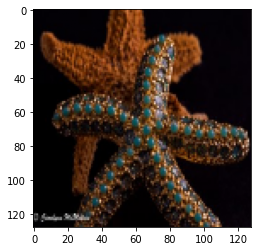

In [35]:
sample_pred=AlexNet_model.predict(np.array(X_test[23]).reshape(-1,128,128,3))
sample_pred = np.argmax(sample_pred, axis=-1)
print("Predicted Label:")
plt.imshow(X_test[23])
print(sample_pred,end="---> ")
print(CATEGORIES[sample_pred[0]])

In [37]:
lis=[]
for image,true,pred in zip(X_test,y_test,y_pred):
    lis.append([image,true,pred])

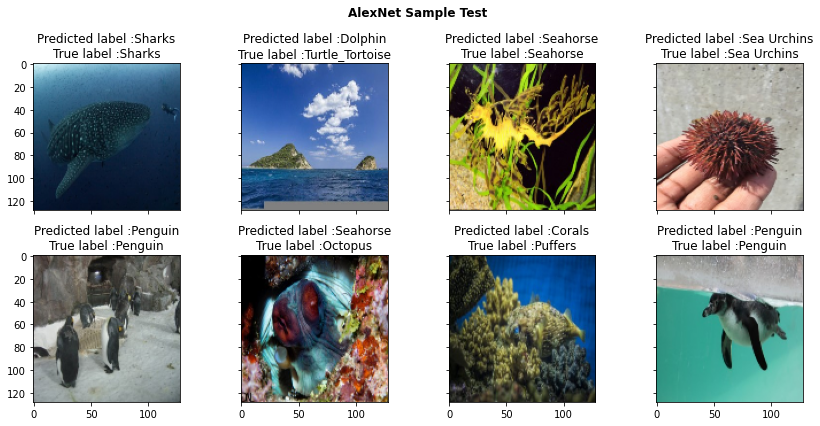

<Figure size 936x432 with 0 Axes>

In [39]:
#Monitoring the model_performance with its predictions and labels
plt.rcParams["figure.figsize"] = (13,6)
n = 0
nrows = 2
ncols = 4

fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
fig.suptitle("AlexNet Sample Test",fontweight ="bold")
for row in range(nrows):
    for col in range(ncols):

        test_image,true_label,pred_label = random.choice(lis) #Make Sure your test image size would be (-1,128,128,3)
        
        ax[row,col].imshow(test_image)
#         sample_pred =  model.predict(np.array(test_image).reshape(-1,128,128,3))
        pred_label = pred_label
        ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(CATEGORIES[pred_label],CATEGORIES[true_label]))
        n += 1
        plt.tight_layout()
plt.show()
plt.savefig("AlexNet Sample Test.jpeg")
